In [31]:
import pandas as pd

data_path = 'rolling_window.csv'

dat = pd.read_csv(data_path, sep=r'[\t,]+', engine='python')

print(dat.head(30))
print(dat.dtypes)

           Location  Land_ice_area  Total_balance    ELA       Date
0      Jamtalferner           3.85          -1.70   2870  1988/1989
1      Jamtalferner           3.85          -1.64   2900  1989/1990
2      Jamtalferner           3.85          -5.54   ****  1990/1991
3      Jamtalferner           3.85          -4.74   ****  1991/1992
4      Jamtalferner           3.85          -1.43   2860  1992/1993
5      Jamtalferner           3.85          -3.18   ****  1993/1994
6      Jamtalferner           3.80          -0.55   2820  1994/1995
7      Jamtalferner           3.79          -2.09   2900  1995/1996
8      Jamtalferner           3.79          -0.82   2800  1996/1997
9      Jamtalferner           3.78          -4.99   ****  1997/1998
10     Jamtalferner           3.78          -0.97   2870  1998/1999
11     Jamtalferner           3.68          -0.30   2765  1999/2000
12     Jamtalferner           3.65          -0.23   2780  2000/2001
13     Jamtalferner           3.62          -2.4

In [32]:
dat['ELA'] = pd.to_numeric(dat['ELA'], errors='coerce')

# Use the first year in the range as the date
dat['Date'] = dat['Date'].str.split('/').str[0]
dat['Date'] = pd.to_datetime(dat['Date'], format='%Y', errors='coerce')

dat_cleaned = dat.dropna()

print(dat_cleaned.dtypes)
print(dat_cleaned.head(30))

Location                 object
Land_ice_area           float64
Total_balance           float64
ELA                     float64
Date             datetime64[ns]
dtype: object
           Location  Land_ice_area  Total_balance     ELA       Date
0      Jamtalferner           3.85          -1.70  2870.0 1988-01-01
1      Jamtalferner           3.85          -1.64  2900.0 1989-01-01
4      Jamtalferner           3.85          -1.43  2860.0 1992-01-01
6      Jamtalferner           3.80          -0.55  2820.0 1994-01-01
7      Jamtalferner           3.79          -2.09  2900.0 1995-01-01
8      Jamtalferner           3.79          -0.82  2800.0 1996-01-01
10     Jamtalferner           3.78          -0.97  2870.0 1998-01-01
11     Jamtalferner           3.68          -0.30  2765.0 1999-01-01
12     Jamtalferner           3.65          -0.23  2780.0 2000-01-01
13     Jamtalferner           3.62          -2.43  2910.0 2001-01-01
15     Jamtalferner           3.46          -0.79  2870.0 2003-01-0

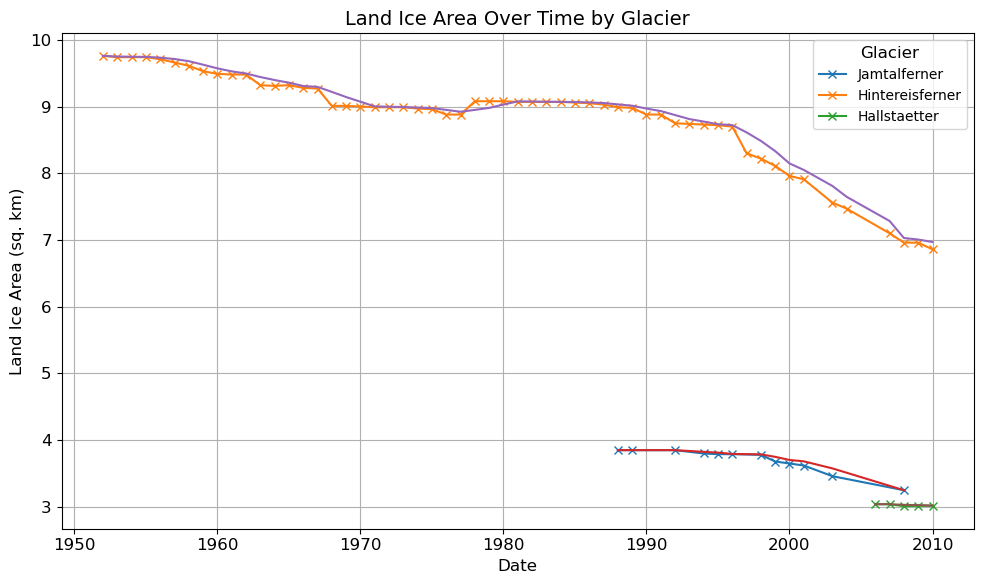

In [33]:
import matplotlib.pyplot as plt

jamtalferner = dat_cleaned[dat_cleaned['Location'] == 'Jamtalferner']
hintereisferner = dat_cleaned[dat_cleaned['Location'] == 'Hintereisferner']
hallstaetter = dat_cleaned[dat_cleaned['Location'] == 'Hallstaetter']

rm2yjam = jamtalferner[['Date', 'Land_ice_area']].rolling(window='1460D', on='Date').mean()
rm2yhin = hintereisferner[['Date', 'Land_ice_area']].rolling(window='1460D', on='Date').mean()
rm2yhal = hallstaetter[['Date', 'Land_ice_area']].rolling(window='1460D', on='Date').mean()

plt.figure(figsize=(10, 6))

plt.plot(jamtalferner['Date'], jamtalferner['Land_ice_area'], label='Jamtalferner', marker='x')
plt.plot(hintereisferner['Date'], hintereisferner['Land_ice_area'], label='Hintereisferner', marker='x')
plt.plot(hallstaetter['Date'], hallstaetter['Land_ice_area'], label='Hallstaetter', marker='x')

plt.plot(rm2yjam['Date'], rm2yjam['Land_ice_area'])
plt.plot(rm2yhin['Date'], rm2yhin['Land_ice_area'])
plt.plot(rm2yhal['Date'], rm2yhal['Land_ice_area'])

plt.title('Land Ice Area Over Time by Glacier', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Land Ice Area (sq. km)', fontsize=12)
plt.legend(title='Glacier', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

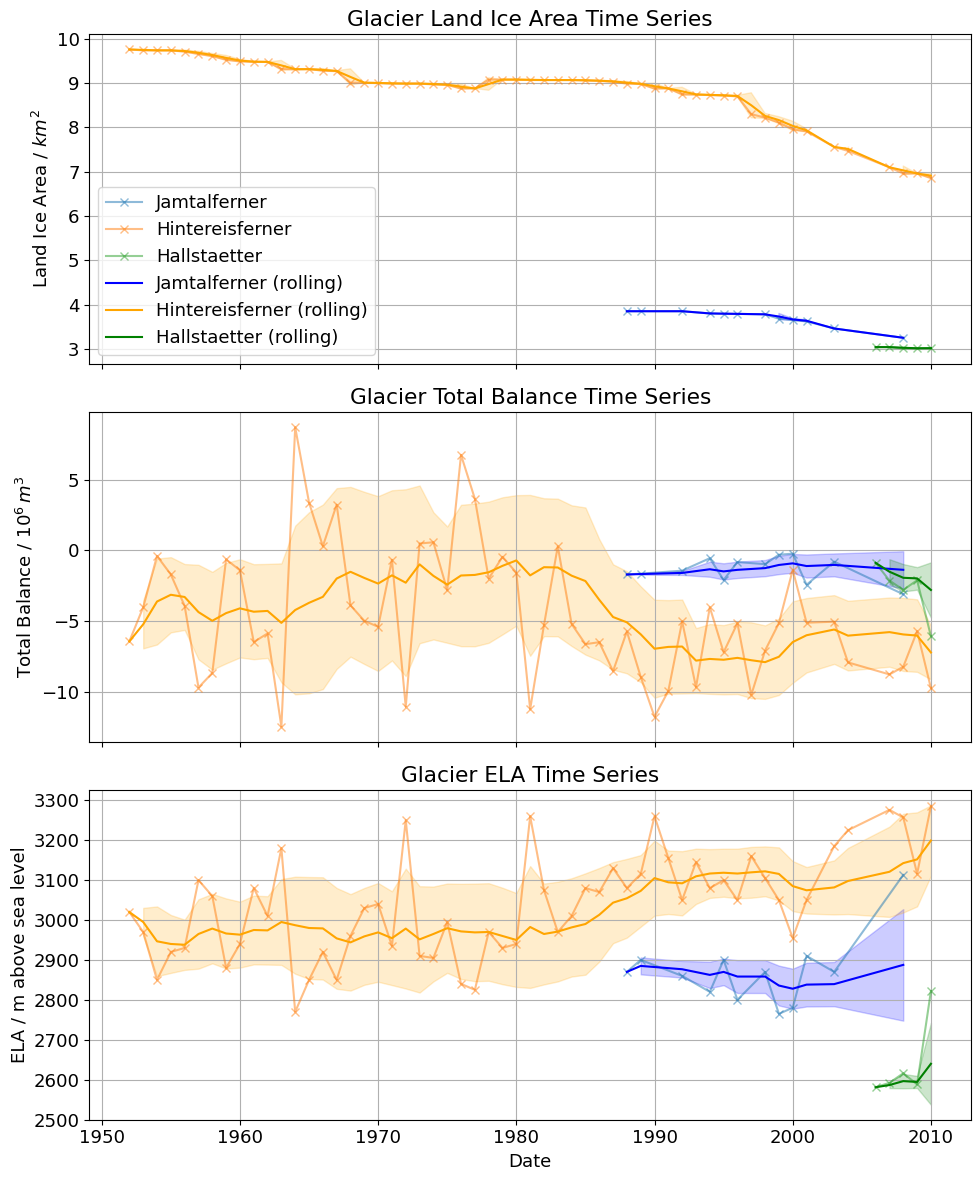

In [34]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 13  # This sets the base font size for all text

rm2yjam_LIA = jamtalferner[['Date','Land_ice_area']].rolling(window='730D', on='Date').mean()
rm2yhin_LIA = hintereisferner[['Date','Land_ice_area']].rolling(window='730D', on='Date').mean()
rm2yhal_LIA = hallstaetter[['Date','Land_ice_area']].rolling(window='730D', on='Date').mean()

rstd2yjam_LIA = jamtalferner[['Date','Land_ice_area']].rolling(window='730D', on='Date').std()
rstd2yhin_LIA = hintereisferner[['Date', 'Land_ice_area']].rolling(window='730D', on='Date').std()
rstd2yhal_LIA = hallstaetter[['Date','Land_ice_area']].rolling(window='730D', on='Date').std()

rm2yjam_TB = jamtalferner[['Date','Total_balance']].rolling(window='3650D', on='Date').mean()
rm2yhin_TB = hintereisferner[['Date','Total_balance']].rolling(window='3650D', on='Date').mean()
rm2yhal_TB = hallstaetter[['Date','Total_balance']].rolling(window='3650D', on='Date').mean()

rstd2yjam_TB = jamtalferner[['Date','Total_balance']].rolling(window='3650D', on='Date').std()
rstd2yhin_TB = hintereisferner[['Date', 'Total_balance']].rolling(window='3650D', on='Date').std()
rstd2yhal_TB = hallstaetter[['Date','Total_balance']].rolling(window='3650D', on='Date').std()

rm2yjam_ELA = jamtalferner[['Date','ELA']].rolling(window='3650D', on='Date').mean()
rm2yhin_ELA = hintereisferner[['Date','ELA']].rolling(window='3650D', on='Date').mean()
rm2yhal_ELA = hallstaetter[['Date','ELA']].rolling(window='3650D', on='Date').mean()

rstd2yjam_ELA = jamtalferner[['Date','ELA']].rolling(window='3650D', on='Date').std()
rstd2yhin_ELA = hintereisferner[['Date', 'ELA']].rolling(window='3650D', on='Date').std()
rstd2yhal_ELA = hallstaetter[['Date','ELA']].rolling(window='3650D', on='Date').std()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

ax1.plot(jamtalferner['Date'], jamtalferner['Land_ice_area'],
         label='Jamtalferner', marker='x', linestyle='-', alpha=0.5)
ax1.plot(hintereisferner['Date'], hintereisferner['Land_ice_area'],
         label='Hintereisferner', marker='x', linestyle='-', alpha=0.5)
ax1.plot(hallstaetter['Date'], hallstaetter['Land_ice_area'],
         label='Hallstaetter', marker='x', linestyle='-', alpha=0.5)

ax1.plot(rm2yjam_LIA['Date'], rm2yjam_LIA['Land_ice_area'],
         label='Jamtalferner (rolling)', color='blue')
ax1.plot(rm2yhin_LIA['Date'], rm2yhin_LIA['Land_ice_area'],
         label='Hintereisferner (rolling)', color='orange')
ax1.plot(rm2yhal_LIA['Date'], rm2yhal_LIA['Land_ice_area'],
         label='Hallstaetter (rolling)', color='green')

ax1.fill_between(
                 rm2yjam_LIA['Date'], 
                 rm2yjam_LIA['Land_ice_area'] - rstd2yjam_LIA['Land_ice_area'], 
                 rm2yjam_LIA['Land_ice_area'] + rstd2yjam_LIA['Land_ice_area'],
                 color='blue',
                 alpha=0.2
)
ax1.fill_between(
                 rm2yhin_LIA['Date'], 
                 rm2yhin_LIA['Land_ice_area'] - rstd2yhin_LIA['Land_ice_area'], 
                 rm2yhin_LIA['Land_ice_area'] + rstd2yhin_LIA['Land_ice_area'],
                 color='orange',
                 alpha=0.2
)
ax1.fill_between(
                 rm2yhal_LIA['Date'], 
                 rm2yhal_LIA['Land_ice_area'] - rstd2yhal_LIA['Land_ice_area'], 
                 rm2yhal_LIA['Land_ice_area'] + rstd2yhal_LIA['Land_ice_area'],
                 color='green',
                 alpha=0.2
)

ax1.grid(True)
ax1.set_ylabel(r'Land Ice Area / $km^2$')
ax1.set_title('Glacier Land Ice Area Time Series')
ax1.legend()

ax2.plot(jamtalferner['Date'], jamtalferner['Total_balance'],
         label='Jamtalferner', marker='x', linestyle='-', alpha=0.5)
ax2.plot(hintereisferner['Date'], hintereisferner['Total_balance'],
         label='Hintereisferner', marker='x', linestyle='-', alpha=0.5)
ax2.plot(hallstaetter['Date'], hallstaetter['Total_balance'],
         label='Hallstaetter', marker='x', linestyle='-', alpha=0.5)

ax2.plot(rm2yjam_TB['Date'], rm2yjam_TB['Total_balance'],
         label='Jamtalferner (rolling)', color='blue')
ax2.plot(rm2yhin_TB['Date'], rm2yhin_TB['Total_balance'],
         label='Hintereisferner (rolling)', color='orange')
ax2.plot(rm2yhal_TB['Date'], rm2yhal_TB['Total_balance'],
         label='Hallstaetter (rolling)', color='green')

ax2.fill_between(
                 rm2yjam_TB['Date'], 
                 rm2yjam_TB['Total_balance'] - rstd2yjam_TB['Total_balance'], 
                 rm2yjam_TB['Total_balance'] + rstd2yjam_TB['Total_balance'],
                 color='blue',
                 alpha=0.2
)
ax2.fill_between(
                 rm2yhin_TB['Date'], 
                 rm2yhin_TB['Total_balance'] - rstd2yhin_TB['Total_balance'], 
                 rm2yhin_TB['Total_balance'] + rstd2yhin_TB['Total_balance'],
                 color='orange',
                 alpha=0.2
)
ax2.fill_between(
                 rm2yhal_TB['Date'], 
                 rm2yhal_TB['Total_balance'] - rstd2yhal_TB['Total_balance'], 
                 rm2yhal_TB['Total_balance'] + rstd2yhal_TB['Total_balance'],
                 color='green',
                 alpha=0.2
)

ax2.grid(True)
ax2.set_ylabel(r'Total Balance / $10^6 \, m^3$')
ax2.set_title('Glacier Total Balance Time Series')

ax3.plot(jamtalferner['Date'], jamtalferner['ELA'],
         label='Jamtalferner', marker='x', linestyle='-', alpha=0.5)
ax3.plot(hintereisferner['Date'], hintereisferner['ELA'],
         label='Hintereisferner', marker='x', linestyle='-', alpha=0.5)
ax3.plot(hallstaetter['Date'], hallstaetter['ELA'],
         label='Hallstaetter', marker='x', linestyle='-', alpha=0.5)

ax3.plot(rm2yjam_ELA['Date'], rm2yjam_ELA['ELA'],
         label='Jamtalferner (rolling)', color='blue')
ax3.plot(rm2yhin_ELA['Date'], rm2yhin_ELA['ELA'],
         label='Hintereisferner (rolling)', color='orange')
ax3.plot(rm2yhal_ELA['Date'], rm2yhal_ELA['ELA'],
         label='Hallstaetter (rolling)', color='green')

ax3.fill_between(
                 rm2yjam_ELA['Date'], 
                 rm2yjam_ELA['ELA'] - rstd2yjam_ELA['ELA'], 
                 rm2yjam_ELA['ELA'] + rstd2yjam_ELA['ELA'],
                 color='blue',
                 alpha=0.2
)
ax3.fill_between(
                 rm2yhin_ELA['Date'], 
                 rm2yhin_ELA['ELA'] - rstd2yhin_ELA['ELA'], 
                 rm2yhin_ELA['ELA'] + rstd2yhin_ELA['ELA'],
                 color='orange',
                 alpha=0.2
)
ax3.fill_between(
                 rm2yhal_ELA['Date'], 
                 rm2yhal_ELA['ELA'] - rstd2yhal_ELA['ELA'], 
                 rm2yhal_ELA['ELA'] + rstd2yhal_ELA['ELA'],
                 color='green',
                 alpha=0.2
)

ax3.grid(True)
ax3.set_ylabel('ELA / m above sea level')
ax3.set_title('Glacier ELA Time Series')

ax3.set_xlabel('Date')

plt.tight_layout()

plt.savefig("rolling_window", dpi=300)

plt.show()